In [1]:
import numpy as np 
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score

In [2]:
!kaggle datasets download -d harshghadiya/kidneystone

Dataset URL: https://www.kaggle.com/datasets/harshghadiya/kidneystone
License(s): other




  0%|          | 0.00/1.89k [00:00<?, ?B/s]
100%|██████████| 1.89k/1.89k [00:00<?, ?B/s]


In [3]:
import zipfile

with zipfile.ZipFile('kidneystone.zip', 'r') as zip_ref:
    zip_ref.extractall('kidney-stone')

In [4]:
df = pd.read_csv('C:/Users/PRATIK PAL/Desktop/Self Study\ML\datasets\kidney-stone-dataset.csv')
df.sample(8)

,Unnamed: 0,gravity,ph,osmo,cond,urea,calc,target
73,73,1.017000,4.810000,410,13.300000,195,0.580000,1
81,81,1.011015,7.004572,443,21.382395,124,1.297972,1
29,29,1.020000,5.440000,781,29.000000,349,3.040000,0
57,57,1.021000,5.560000,658,23.600000,224,2.330000,1
46,46,1.024000,5.770000,698,19.500000,354,13.000000,1
65,65,1.012000,6.750000,251,5.100000,141,0.650000,1
50,50,1.013000,5.860000,531,21.400000,197,4.740000,1
45,45,1.021000,5.940000,774,27.900000,325,6.960000,1


In [5]:
df.drop('Unnamed: 0', axis=1, inplace=True)
df

,gravity,ph,osmo,cond,urea,calc,target
0,1.021000,4.910000,725,14.000000,443,2.450000,0
1,1.017000,5.740000,577,20.000000,296,4.490000,0
2,1.008000,7.200000,321,14.900000,101,2.360000,0
3,1.011000,5.510000,408,12.600000,224,2.150000,0
4,1.005000,6.520000,187,7.500000,91,1.160000,0
...,...,...,...,...,...,...,...
85,1.021452,5.556081,756,24.241481,367,7.669120,1
86,1.016501,6.900257,549,20.549790,204,5.775256,1
87,1.032754,5.443491,1085,23.188653,576,8.664169,1
88,1.023870,5.106433,325,12.124689,50,0.781620,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   gravity  90 non-null     float64
 1   ph       90 non-null     float64
 2   osmo     90 non-null     int64  
 3   cond     90 non-null     float64
 4   urea     90 non-null     int64  
 5   calc     90 non-null     float64
 6   target   90 non-null     int64  
dtypes: float64(4), int64(3)
memory usage: 5.0 KB


In [7]:
df.describe()

,gravity,ph,osmo,cond,urea,calc,target
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,1.017952,6.036651,602.333333,20.621687,258.200000,4.017788,0.500000
std,0.006780,0.711801,238.459805,7.654448,135.381127,3.016273,0.502801
min,1.005000,4.760000,187.000000,5.100000,10.000000,0.170000,0.000000
25%,1.012258,5.536520,411.500000,14.150000,148.250000,1.412500,0.000000
50%,1.018000,5.936247,572.000000,21.177172,231.500000,3.230000,0.500000
75%,1.023000,6.490000,778.000000,26.075000,366.250000,5.965127,1.000000
max,1.034000,7.940000,1236.000000,38.000000,620.000000,13.000000,1.000000


In [8]:
df.groupby('target').mean()

,gravity,ph,osmo,cond,urea,calc
target,,,,,,
0,1.015489,6.098667,565.288889,20.404444,237.111111,2.624889
1,1.020415,5.974635,639.377778,20.838930,279.288889,5.410687


<Axes: xlabel='target', ylabel='count'>

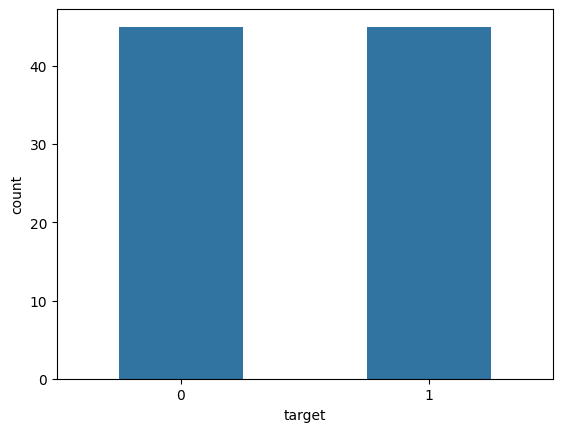

In [9]:
sns.countplot(df,x='target',width=0.5)

- 0--> no risk
- 1--> risk of stone

<Axes: >

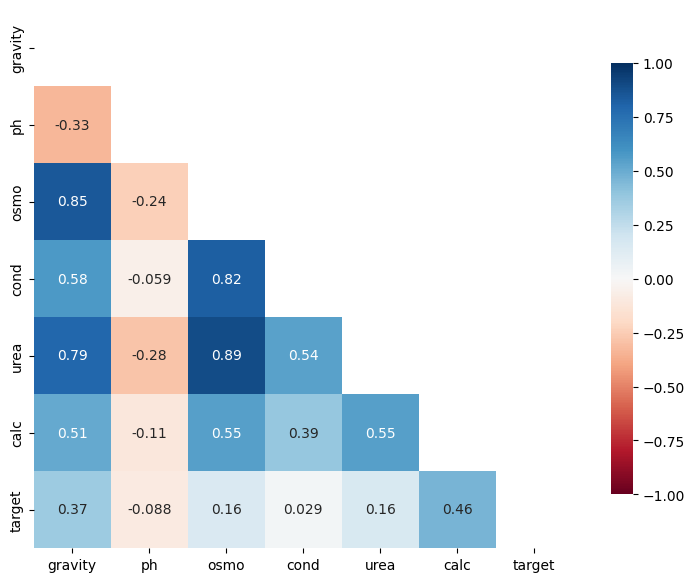

In [10]:
plt.figure(figsize=(10,7))
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, cmap='RdBu', mask=mask, square=True, cbar_kws={'shrink':0.8})

<Axes: ylabel='Frequency'>

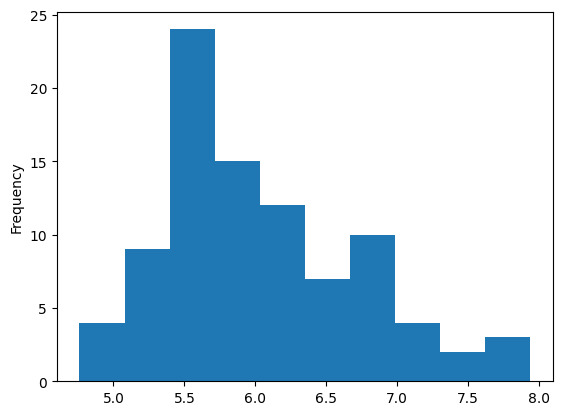

In [11]:
df['ph'].plot.hist()

<Axes: >

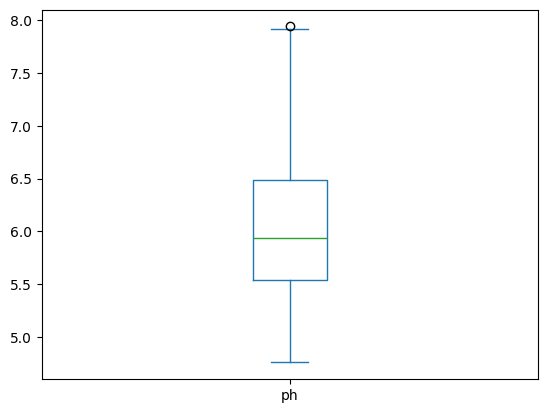

In [12]:
df['ph'].plot.box()

#### **Data wrangling**

In [13]:
df.isnull().sum()

gravity    0
ph         0
osmo       0
cond       0
urea       0
calc       0
target     0
dtype: int64

In [14]:
X=df.drop('target',axis=1)
y=df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
sc = MinMaxScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [16]:
print(X.shape, X_train.shape, X_test.shape)

(90, 6) (72, 6) (18, 6)


In [17]:
lg=LogisticRegression()
lg.fit(X_train_sc,y_train)
y_pred=lg.predict(X_test_sc)
accuracy_score(y_test,y_pred)

0.6111111111111112

In [18]:
kn=KNeighborsClassifier(n_neighbors=4)
kn.fit(X_train_sc,y_train)
y_pred=kn.predict(X_test_sc)
accuracy_score(y_test,y_pred)

0.7222222222222222

In [19]:
rf=RandomForestClassifier(n_estimators=10,max_depth=3)
rf.fit(X_train,y_train)
y_pr=rf.predict(X_test)
accuracy_score(y_test,y_pr)

0.6666666666666666

In [20]:
gb=GaussianNB()
gb.fit(X_train_sc,y_train)
y_pr=gb.predict(X_test_sc)
accuracy_score(y_test,y_pr)

0.6111111111111112

In [21]:
dt=RandomForestClassifier(n_estimators=10)
dt.fit(X_train,y_train)
y_pr=dt.predict(X_test)
acc = accuracy_score(y_test,y_pr)

<Axes: >

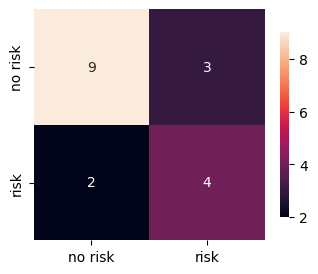

In [22]:
cm = confusion_matrix(y_test, y_pr)
plt.figure(figsize=(4,3))
lbl=['no risk', 'risk']
sns.heatmap(cm, annot=True, xticklabels=lbl, yticklabels=lbl, square=True, cbar_kws={'shrink':0.8})

In [23]:
import joblib as j
j.dump(dt,'dt.joblib')

['dt.joblib']

In [59]:
precision_score(y_test, y_pr)

0.4444444444444444

In [60]:
recall_score(y_test, y_pr)

0.6666666666666666

#### **User input**

In [80]:
# 1.008,7.2,321,14.9,101,2.36,0
# 1.011,5.21,450,17.9,161,1.53,0
# 1.026,6.19,956,27.6,473,5.67,1
# 1.034,5.24,1236,27.3,620,12.68,1
gravity=['1.027']#grav
ph=['6.20']#p
osmo=['956']#os
cond=['27.60']#co
urea=['473']#ur
calc=['5.67']#cl

dict = {'gravity': gravity,'ph':  ph,'osmo':  osmo,'cond': cond,'urea': urea,'calc':calc }

dif = pd.DataFrame(dict)

In [81]:
y_pri=dt.predict(dif)
acc=round(acc,3)
if y_pri[0]==0:
  print(f'No risk with probability {acc*100}%')
else:
   print(f'Risk of stone with probability {acc*100}%')

Risk of stone with probability 83.3%
